In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
import cv2 as cv
import pathlib
from keras import layers
from keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras_tuner
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
data_size = 1000

In [ ]:
labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
rices_names = {'Arborio': [], 'Basmati': [], 'Ipsala': [], 'Jasmine': [], 'Karacadag': []}
base = 'C:\\Users\\kordz\\OneDrive\\Desktop\\Lacture 24\\Rice_Image_Dataset'
for i in range(1, data_size + 1):
    rices_names.get('Arborio').append(cv.imread(f"{base}\\{labels[0]}\\{labels[0]} ({i}).jpg"))
    rices_names.get('Basmati').append(cv.imread(f"{base}\\{labels[1]}\\{labels[1]} ({i}).jpg"))
    rices_names.get('Ipsala').append(cv.imread(f"{base}\\{labels[2]}\\{labels[2]} ({i}).jpg"))
    rices_names.get('Jasmine').append(cv.imread(f"{base}\\{labels[3]}\\{labels[3]} ({i}).jpg"))
    rices_names.get('Karacadag').append(cv.imread(f"{base}\\{labels[4]}\\{labels[4]} ({i}).jpg"))

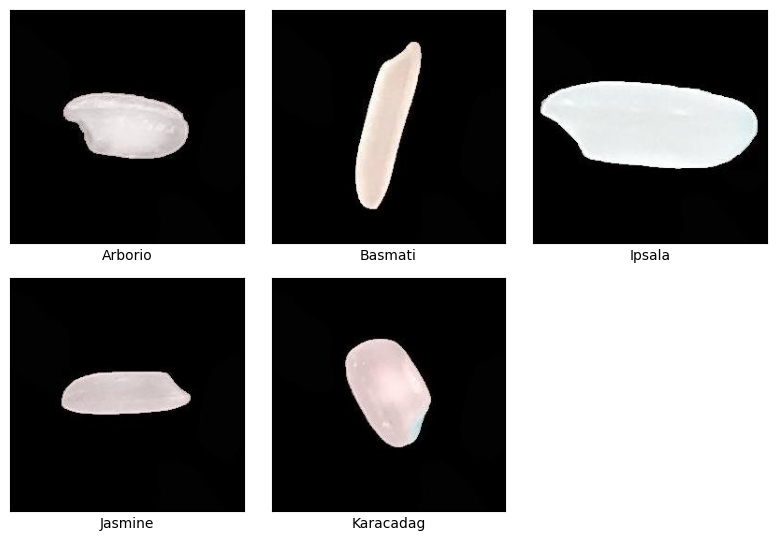

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(5):
    plt.subplot(3, 3, i+1)
    img = rices_names.get(labels[i])[0]
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labels[i])
plt.tight_layout()
plt.show()

In [ ]:
arborio = rices_names[labels[0]]
basmati = rices_names[labels[1]]
ipsala = rices_names[labels[2]]
jasmine = rices_names[labels[3]]
karacadag = rices_names[labels[4]]

In [ ]:
images = [arborio + basmati + ipsala + jasmine + karacadag][0]
arborio_labels = ['arborio'] * data_size
basmati_labels = ['basmati'] * data_size
ipsala_labels = ['ipsala'] * data_size
jasmine_labels = ['jasmine'] * data_size
karacadag_labels = ['karacadag'] * data_size
labels = arborio_labels + basmati_labels + ipsala_labels + jasmine_labels + karacadag_labels

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, shuffle=True, random_state=60, stratify=labels)

In [ ]:
label_encoder = LabelEncoder()

train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

In [ ]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

train_images = train_images / 255
test_images = test_images / 255

In [ ]:
print("train_image:", train_images.shape)
print("test_image:", test_images.shape)
print("train_labels:", train_labels.shape)
print("test_labels:", test_labels.shape)

train_image: (4000, 250, 250, 3)
test_image: (1000, 250, 250, 3)
train_labels: (4000,)
test_labels: (1000,)


In [ ]:
def build_model(hp):
    model = keras.Sequential([
        layers.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    adam_learning_rate = hp.Choice('learning_rate', values = [3e-4])
    adam_weight_decay = hp.Choice('weight_decay', values = [0.0001])
    adam = keras.optimizers.Adam(learning_rate=adam_learning_rate, weight_decay=adam_weight_decay)

    model.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective = 'accuracy',
    max_trials = 1,
)

In [ ]:
tuner.search(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))
best_model = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 1 Complete [00h 02m 46s]
accuracy: 0.9152500033378601

Best accuracy So Far: 0.9152500033378601
Total elapsed time: 00h 02m 46s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
finished = tuner.hypermodel.build(best_hps)
finished.save('rice_classification_model.keras')

In [ ]:
model_ = keras.models.load_model('rice_classification_model.keras')

C:\Users\kordz\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
adam_learning_rate = best_hps.get('learning_rate')
adam_weight_decay = best_hps.get('weight_decay')
adam = keras.optimizers.Adam(learning_rate=adam_learning_rate, weight_decay=adam_weight_decay)

model_.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
another_test = cv.imread(f"{base}\\{labels[0]}\\{labels[0]} ({data_size + 570}).jpg") / 255

In [ ]:
another_test = another_test.reshape((1, 250, 250, 3))

In [ ]:
pred = model_.predict(another_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [ ]:
labels_ = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
print('Predicted category is: ', labels_[pred.argmax()])

Predicted category is:  Basmati
